In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step


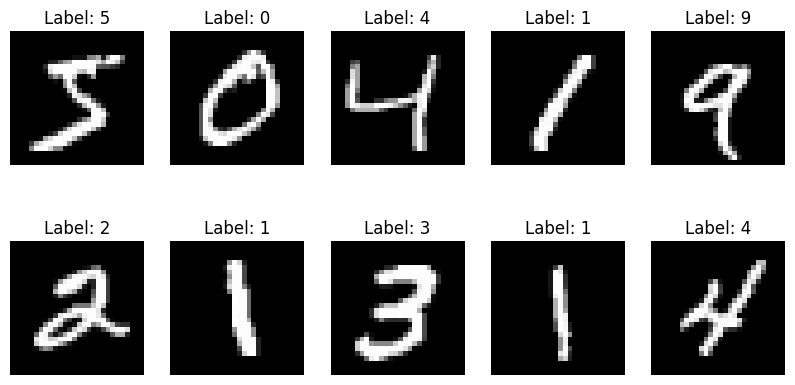

In [6]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 67s 70ms/step - loss: 0.1816 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9832
Epoch 2/5
938/938 [==============================] - 69s 73ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 3/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 65s 70ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 64s 69ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0313 - val_accuracy: 0.9909


In [9]:
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step - loss: 0.0313 - accuracy: 0.9909
Test accuracy: 0.9908999800682068


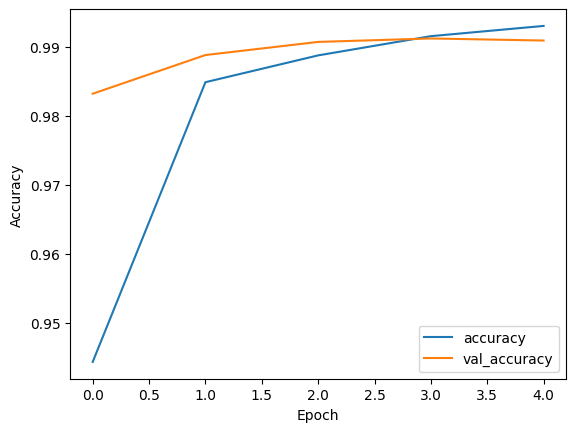

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 85ms/step


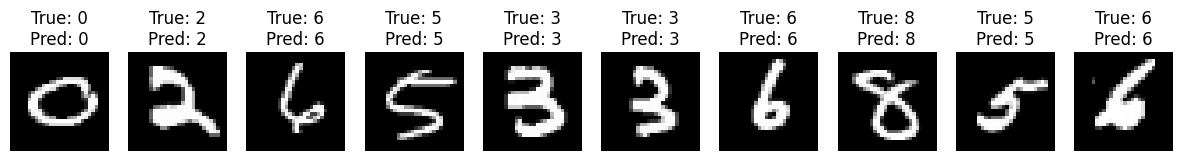

In [12]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/mnist_cnn_model.h5')

# Predict labels for some test images
num_samples = 10
random_indices = np.random.choice(test_images.shape[0], num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display original and predicted outputs
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(sample_labels[i])}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()